In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from astropy.io import fits
from scipy import ndimage
import matplotlib.cbook as cbook
import matplotlib.image as mpimg

In [4]:
#Calling FITS file for co_25_74

location = "/Users/RuheeJanmohamed/Desktop/Data/co_25_74_M0.fits"

hdul = fits.open(location)

hdu_25_74 = hdul[0]

co_25_74 = hdu_25_74.data

#Calling FITS file for co_75_124

location = "/Users/RuheeJanmohamed/Desktop/Data/co_75_124_M0.fits"

hdul = fits.open(location)

hdu_75_124 = hdul[0]

co_75_124 = hdu_75_124.data

#Calling FITS file for co_125_174

location = "/Users/RuheeJanmohamed/Desktop/Data/co_125_174_M0.fits"

hdul = fits.open(location)

hdu_125_174 = hdul[0]

co_125_174 = hdu_125_174.data

#Calling FITS file for co_175_224

location = "/Users/RuheeJanmohamed/Desktop/Data/co_175_224_M0.fits"

hdul = fits.open(location)

hdu_175_224 = hdul[0]

co_175_224 = hdu_175_224.data

#Calling FITS file for co_225_274

location = "/Users/RuheeJanmohamed/Desktop/Data/co_225_274_M0.fits"

hdul = fits.open(location)

hdu_225_274 = hdul[0]

co_225_274 = hdu_225_274.data

#Calling FITS file for co_275_299

location = "/Users/RuheeJanmohamed/Desktop/Data/co_275_299_M0.fits"

hdul = fits.open(location)

hdu_275_299 = hdul[0]

co_275_299 = hdu_275_299.data

#Calling FITS file for co_300_224

location = "/Users/RuheeJanmohamed/Desktop/Data/co_300_324_M0.fits"

hdul = fits.open(location)

hdu_300_324 = hdul[0]

co_300_324 = hdu_300_324.data


#Calling FITS file for co_325_374

location = "/Users/RuheeJanmohamed/Desktop/Data/co_325_374_M0.fits"

hdul = fits.open(location)

hdu_325_374 = hdul[0]

co_325_374 = hdu_325_374.data

#Calling FITS file for co_375_424

location = "/Users/RuheeJanmohamed/Desktop/Data/co_375_424_M0.fits"

hdul = fits.open(location)

hdu_375_424 = hdul[0]

co_375_424 = hdu_375_424.data

#Calling FITS file for co_425_474

location = "/Users/RuheeJanmohamed/Desktop/Data/co_425_474_M0.fits"

hdul = fits.open(location)

hdu_425_474 = hdul[0]

co_425_474 = hdu_425_474.data

#Calling FITS file for co_475_524

location = "/Users/RuheeJanmohamed/Desktop/Data/co_475_524_M0.fits"

hdul = fits.open(location)

hdu_475_524 = hdul[0]

co_475_524 = hdu_475_524.data

#Calling FITS file for co_525_574

location = "/Users/RuheeJanmohamed/Desktop/Data/co_525_574_M0.fits"

hdul = fits.open(location)

hdu_525_574 = hdul[0]

co_525_574 = hdu_525_574.data

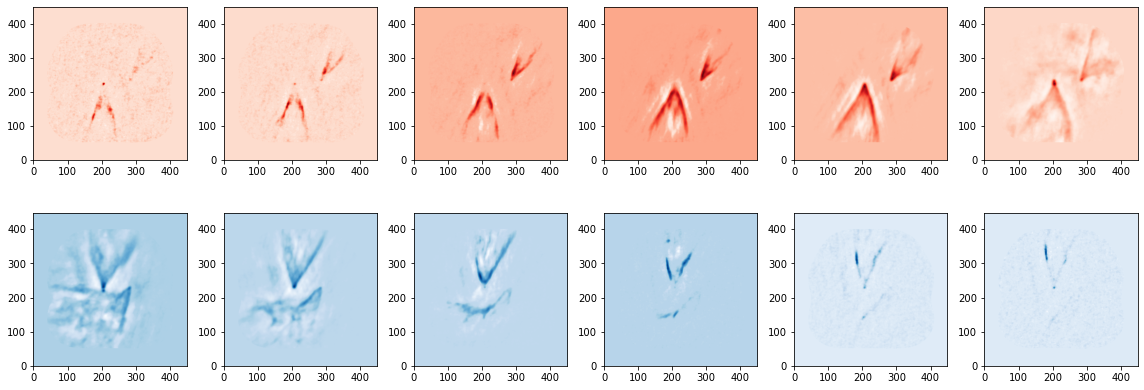

In [5]:
fig, axis = plt.subplots(2,6, figsize=(16,6))

co_maps = [
    co_25_74,co_75_124,co_125_174,co_175_224,co_225_274,co_275_299,
    co_300_324,co_325_374,co_375_424,co_425_474,co_475_524,co_525_574
]



for ax,co_map in zip(axis.flat[0:6],co_maps[0:6]):
    ax.imshow(co_map,cmap='Reds',origin='lower')

    
for ax,co_map in zip(axis.flat[6:12],co_maps[6:12]):
    ax.imshow(co_map,cmap='Blues',origin='lower')  
    
plt.tight_layout()

fig.savefig("Moment_0_Maps.png",dpi=500)

## Defining Gaussian, Angle and Line Fit

In [6]:
def Line_Base(x,m):
    
    f = (x)*m
    return f

def Line_angle(a,b):
    theta1 = np.arctan(a)
    theta2 = np.arctan(b)

    combined_theta = [theta1,theta2]

    theta_list = []

    for theta in combined_theta:
        if np.sign(theta) == -1:
            new_theta = np.pi-abs(theta)
            theta_list.append(np.rad2deg(new_theta))
        else:
            theta_list.append(np.rad2deg(theta))
            
    f = np.abs(theta_list[0]-theta_list[1]) #difference in angle from the horizontal
            
    return f


def Double_Gauss(x,amp_1,mean_1,sigma_1,amp_2,mean_2,sigma_2):
    f = (amp_1 * np.exp(-(x - mean_1)**2/(2*sigma_1**2))+ (amp_2 * np.exp(-(x-mean_2)**2/(2*sigma_2**2))))
    return f



In [7]:
#Gaussian function

def Gaussian_func(filename,offset_1,offset_2,channel,a,b,width):
    Model_Values = open(filename, "w")

    Model_Values.write("y_cut\tfit_pk_1\tfit_x_1\tfit_s_1\tfit_pk_2\tfit_x_2\tfit_s_2\tfit_pk_e\tfit_x_e\tfit_s_e\tx_c1\tx_c2\tpk_c1\tpk_c2\n")

    offset_x1 = offset_1 
    offset_x2 = offset_2

    first = 0

    for ycut in ycut_list:
        cut = channel[ycut[0]:ycut[1],offset_x1:offset_x2]
        avg_cut = np.mean(cut,axis=0)
        avg_cut[avg_cut<0]=0 #doesn't change original image
        xdata=np.arange(a,b)
        idata=avg_cut[a:b] 

        if (first < 1): #giving it intial first guess
            p0 = (np.max(idata),xdata[np.argmax(idata)],5,np.max(idata),xdata[np.argmax(idata)]-width,5)
            first =1
        else:
            p0 = p_opt #telling it to look where it was before

        p_opt,p_cov = curve_fit(Double_Gauss,xdata,idata,p0,maxfev=900000)



        plt.plot(range(offset_2-offset_1),avg_cut,c='k')
        plt.plot(xdata,Double_Gauss(xdata,p_opt[0],p_opt[1],p_opt[2],p_opt[3],p_opt[4],p_opt[5]))

        Err =np.sqrt(np.diag(p_cov))
        Model_Values.write("%f\t" % np.mean(ycut)) #,0.
        Model_Values.write("%f\t%f\t%f\t\t%f\t\t%f\t\t%f\t\t" % (p_opt[0],p_opt[1]+offset_x1,p_opt[2],p_opt[3],p_opt[4]+offset_x1,p_opt[5]))
        Model_Values.write("%f\t%f\t%f\t%f\t%f\t%f\t" % (Err[0],Err[1],Err[2],Err[3],Err[4],Err[5]))
        Model_Values.write("%f\t%f\t" % (xdata[idata==np.max(idata)]+offset_x1,xdata[np.argmax(idata)]+offset_x1))
        Model_Values.write("%f\t%f\t" % (np.max(idata),np.max(idata)))
        Model_Values.write("\n")


    plt.xlabel("Position")
    plt.ylabel("Intensity")
    Model_Values.close()
    
    

In [62]:
#Splicing Function

def splice_func(param1,param2,param3,param4,start_ind,end_ind):
    
    if start_ind == 'lol' and end_ind == 'lol':
        return (param1[:],param2[:],param3[:],param4[:])
        
    elif start_ind == 'lol':
        return (param1[:end_ind],param2[:end_ind],param3[:end_ind],param4[:end_ind])
        
    elif end_ind == 'lol':
        return (param1[start_ind:],param2[start_ind:],param3[start_ind:],param4[start_ind:])
        
    else:
        return (param1[start_ind:end_ind],param2[start_ind:end_ind],param3[start_ind:end_ind],param4[start_ind:end_ind])
        

In [63]:
#Plotting Gaussian

def Gaussian_plot(filename,star_x,star_y,text_x,text_y,figure_name,outflow_type,start_ind='lol',end_ind='lol'):
    
    ycut_right,xfit_right = np.genfromtxt(filename, skip_header = 2, unpack=True, usecols=[0,2])
    ycut_left,xfit_left = np.genfromtxt(filename, skip_header = 2, unpack=True, usecols=[0,5])
    
    ycut_right,xfit_right,ycut_left,xfit_left = splice_func(ycut_right,xfit_right,ycut_left,xfit_left,start_ind,end_ind)
    
    l_opt,l_cov = curve_fit(Line_Base,xfit_right-star_x,ycut_right-star_y)  
    p_opt,p_cov = curve_fit(Line_Base,xfit_left-star_x,ycut_left-star_y)
    
    angle = Line_angle(p_opt[0],l_opt[0])
    
    fig = plt.figure(figsize=[8,8])
    ax = fig.subplots()
    ax.set_aspect('equal')
    
    if outflow_type == "main":
        x_plt_right = np.array([0,max(xfit_right)-star_x])
        x_plt_left = np.array([0,min(xfit_left)-star_x])
        
    elif outflow_type == "secondary": 
        x_plt_right = np.array([0,min(xfit_right)-star_x])
        x_plt_left = np.array([0,max(xfit_left)-star_x])


    ax.plot(x_plt_right+star_x,Line_Base(x_plt_right,l_opt[0])+star_y) #200,230
    ax.scatter(xfit_right,ycut_right,s = 5, color = 'b', label = 'Right Side') #Original data points

    ax.plot(star_x,star_y,'ro') #Protostar
    ax.text(text_x,text_y, (r'Angle: {:.3f}'.format(angle)+" degrees"),weight='bold')

    ax.plot(x_plt_left+star_x,Line_Base(x_plt_left,p_opt[0])+star_y) #205,215
    ax.scatter(xfit_left,ycut_left,s = 5, color = 'r', label = 'Left Side') #Original data points

    fig.savefig(figure_name)
    

In [80]:
def Gaussian_subplot(filename,star_x,star_y,text_x,text_y,figure_name,outflow_type,i,j,start_ind='lol',end_ind='lol'):
    
    ycut_right,xfit_right = np.genfromtxt(filename, skip_header = 2, unpack=True, usecols=[0,2])
    ycut_left,xfit_left = np.genfromtxt(filename, skip_header = 2, unpack=True, usecols=[0,5])
    
    ycut_right,xfit_right,ycut_left,xfit_left = splice_func(ycut_right,xfit_right,ycut_left,xfit_left,start_ind,end_ind)
    
    l_opt,l_cov = curve_fit(Line_Base,xfit_right-star_x,ycut_right-star_y)  
    p_opt,p_cov = curve_fit(Line_Base,xfit_left-star_x,ycut_left-star_y)
    
    angle = Line_angle(p_opt[0],l_opt[0])
    
#     fig = plt.figure(figsize=[8,8])
    ax[i,j].set_aspect('equal')
    
    if outflow_type == "main":
        x_plt_right = np.array([0,max(xfit_right)-star_x])
        x_plt_left = np.array([0,min(xfit_left)-star_x])
        
    elif outflow_type == "secondary": 
        x_plt_right = np.array([0,min(xfit_right)-star_x])
        x_plt_left = np.array([0,max(xfit_left)-star_x])

    
    ax[i,j].plot(x_plt_right+star_x,Line_Base(x_plt_right,l_opt[0])+star_y) #200,230
    ax[i,j].scatter(xfit_right,ycut_right,s = 5, color = 'b', label = 'Right Side') #Original data points

    ax[i,j].plot(star_x,star_y,'ro') #Protostar
    ax[i,j].text(text_x,text_y, (r'Angle: {:.3f}'.format(angle)+" $^{o}$"),weight='bold')

    ax[i,j].plot(x_plt_left+star_x,Line_Base(x_plt_left,p_opt[0])+star_y) #205,215
    ax[i,j].scatter(xfit_left,ycut_left,s = 5, color = 'r', label = 'Left Side') #Original data points

    fig.savefig(figure_name)
    
    

## Blueshifted Main Outflows

In [12]:
ycut_list = [(380-((i+1)*5),380-(i*5)) for i in range(31)] #starting at the widest part and work towards star

print(ycut_list)

[(375, 380), (370, 375), (365, 370), (360, 365), (355, 360), (350, 355), (345, 350), (340, 345), (335, 340), (330, 335), (325, 330), (320, 325), (315, 320), (310, 315), (305, 310), (300, 305), (295, 300), (290, 295), (285, 290), (280, 285), (275, 280), (270, 275), (265, 270), (260, 265), (255, 260), (250, 255), (245, 250), (240, 245), (235, 240), (230, 235), (225, 230)]


### co_300_324

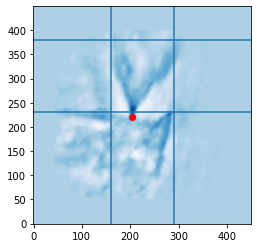

In [13]:
plt.imshow(co_300_324,cmap='Blues',origin='lower')
plt.axvline(160)
plt.axvline(290)
plt.axhline(380)
plt.axhline(230)
plt.plot(204,220,'ro') #Protostar

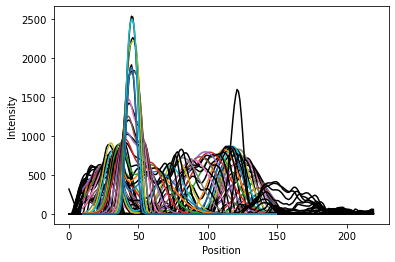

In [14]:
Gaussian_func("VelocityMaps_co_300_324_North.txt",160,380,co_300_324,10,150,100)

No Slice


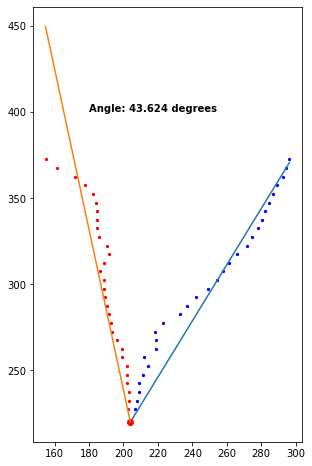

In [15]:
Gaussian_plot('VelocityMaps_co_300_324_North.txt',204,220,180,400,"VelocityMap_Co_300_324_Blue.png","main")

#filename,star_x,star_y,text_x,text_y,figure_name,start_ind='lol',end_ind='lol'

### Co_325_374

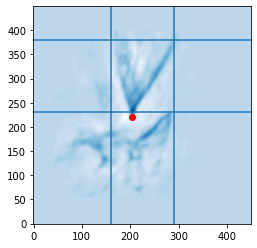

In [16]:
plt.imshow(co_325_374,cmap='Blues',origin='lower')
plt.axvline(160)
plt.axvline(290)
plt.axhline(380)
plt.axhline(230)
plt.plot(204,220,'ro') #Protostar

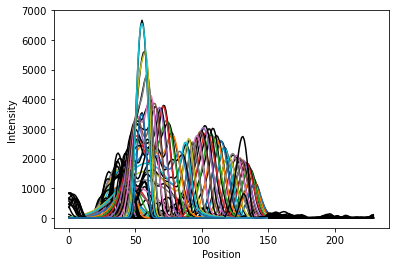

In [17]:
Gaussian_func("VelocityMaps_co_325_374_North.txt",150,380,co_325_374,0,150,100)

No Slice


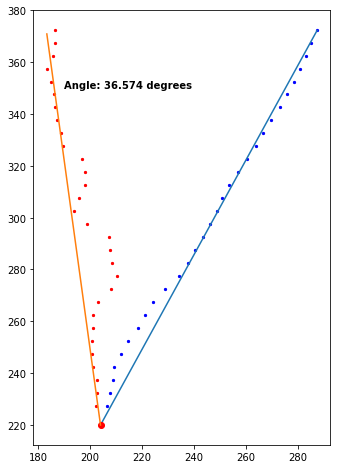

In [18]:
Gaussian_plot('VelocityMaps_co_325_374_North.txt',204,220,190,350,"VelocityMap_Co_325_374_Blue.png","main")

### Co_375_424

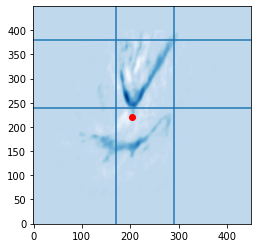

In [19]:
plt.imshow(co_375_424,cmap='Blues',origin='lower')
plt.axvline(170)
plt.axvline(290)
plt.axhline(380)
plt.axhline(240)
plt.plot(204,220,'ro') #Protostar

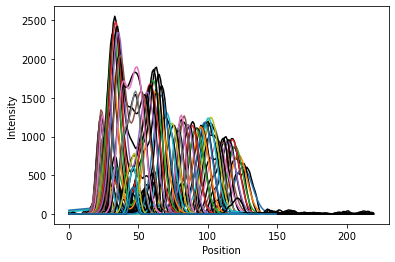

In [20]:
Gaussian_func("VelocityMaps_co_375_424_North.txt",160,380,co_375_424,0,150,100)

Front Slice


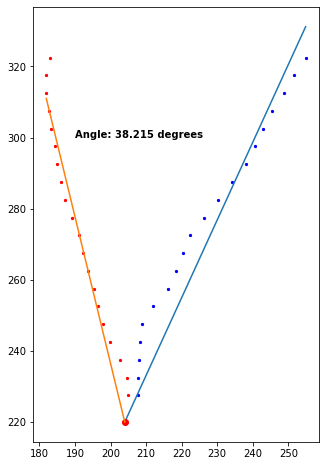

In [21]:
Gaussian_plot('VelocityMaps_co_375_424_North.txt',204,220,190,300,"VelocityMap_Co_375_424_Blue.png","main",start_ind=10)

### Co_425_474

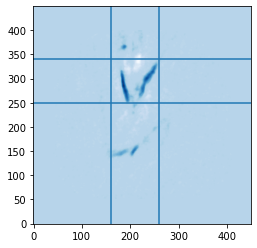

In [22]:
plt.imshow(co_425_474,cmap='Blues',origin='lower')
plt.axvline(160)
plt.axvline(260)
plt.axhline(340)
plt.axhline(250)

/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-

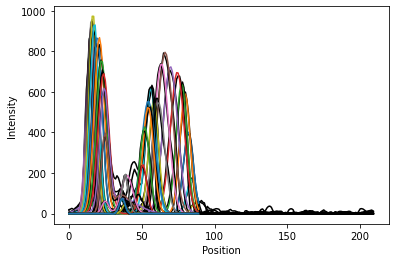

In [23]:
Gaussian_func("VelocityMaps_co_425_474_North.txt",170,380,co_425_474,0,90,80)

Full Slice


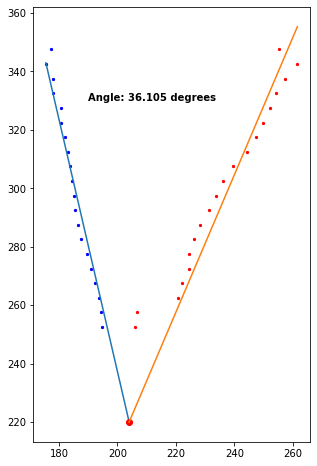

In [24]:
Gaussian_plot('VelocityMaps_co_425_474_North.txt',204,220,190,330,"VelocityMap_Co_425_474_Blue.png","secondary",start_ind=5,end_ind=25)

### Co_475_524

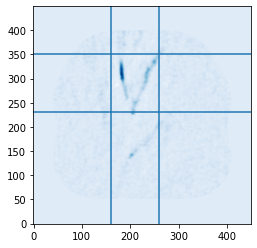

In [25]:
plt.imshow(co_475_524,cmap='Blues',origin='lower')
plt.axvline(160)
plt.axvline(260)
plt.axhline(350)
plt.axhline(230)

<ipython-input-7-9ebc17a229ec>:33: RuntimeWarning: invalid value encountered in sqrt
  Err =np.sqrt(np.diag(p_cov))


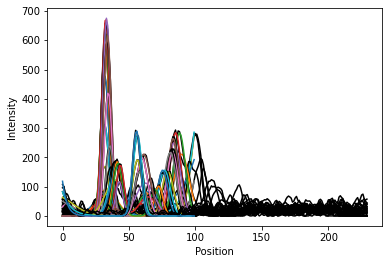

In [26]:
Gaussian_func("VelocityMaps_co_475_524_North.txt",150,380,co_475_524,0,100,50)

Full Slice


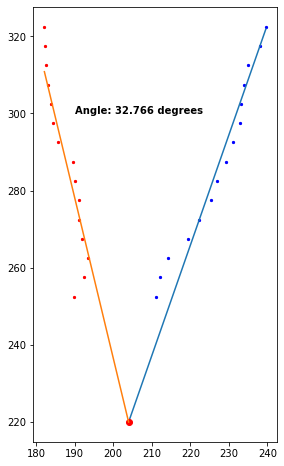

In [27]:
Gaussian_plot('VelocityMaps_co_475_524_North.txt',204,220,190,300,"VelocityMap_Co_475_524_Blue.png","main",start_ind=10,end_ind=25)

### Co_525_574

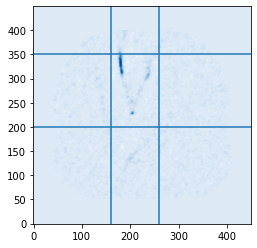

In [28]:
plt.imshow(co_525_574,cmap='Blues',origin='lower')
plt.axvline(160)
plt.axvline(260)
plt.axhline(350)
plt.axhline(200)



/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-

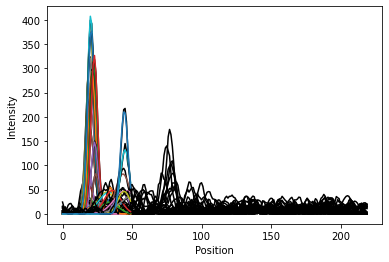

In [29]:
Gaussian_func("VelocityMaps_co_525_574_North.txt",160,380,co_525_574,0,50,50)

No Slice


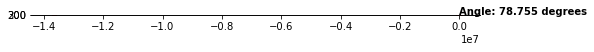

In [30]:
Gaussian_plot('VelocityMaps_co_525_574_North.txt',204,220,190,300,"VelocityMap_Co_525_574_Blue.png","main")

In [31]:
ycut_right_Main_525_574,xfit_right_Main_525_574 = np.genfromtxt("VelocityMaps_co_525_574_North.txt", skip_header = 2, unpack=True, usecols=[0,2])
ycut_left_Main_525_574,xfit_left_Main_525_574 = np.genfromtxt("VelocityMaps_co_525_574_North.txt", skip_header = 2, unpack=True, usecols=[0,5])

print(xfit_right_Main_525_574)
print(xfit_left_Main_525_574)

[181.252323 177.811285 179.094837 178.722198 179.376693 180.171967
 179.713162 180.131787 180.269708 180.595881 181.290589 182.342731
 182.852551 183.01375  183.877494 185.182108 190.956375 191.614445
 193.578056 196.581613 194.208148 193.692181 195.979725 202.672545
 203.402291 205.613422 211.111092 204.266907 204.935377 204.426049]
[-13667760.357869 -13667760.357869 -13667760.357869 -13667760.357869
 -13667760.357869 -13667760.357869 -13667760.357869 -13667760.357869
 -13667760.357869 -13667760.357869 -13667760.357869 -13667760.357869
 -13667760.357869 -13667760.357869 -13667760.357869 -13667760.357869
 -13667760.357869 -13667760.357869 -13667760.357869 -13667760.357869
 -13667760.357869 -13667760.357869 -13667760.357869 -13667760.357869
 -13667760.357869 -13667760.357869 -13667760.357869 -13667760.357869
 -13667324.46861  -13666913.637659]


# Secondary Outflows

In [32]:
ycut_list = [(150+((i)*5),150+((i+1)*5)) for i in range(20)] #starting at the widest part and work towards star

# print(ycut_list)

### Co_300_324

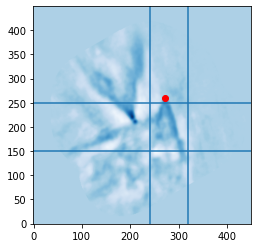

In [33]:
co_300_324_rot = ndimage.rotate(co_300_324, angle=-30,reshape=False)
plt.imshow(co_300_324_rot,cmap='Blues',origin='lower')
plt.axvline(240)
plt.axvline(320)
plt.axhline(250)
plt.axhline(150)
plt.plot(272,260,'ro') #Protostar

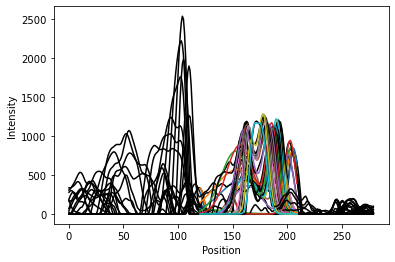

In [34]:
Gaussian_func("VelocityMaps_co_300_324_SecondaryNorth.txt",100,380,co_300_324_rot,120,210,100)

Full Slice


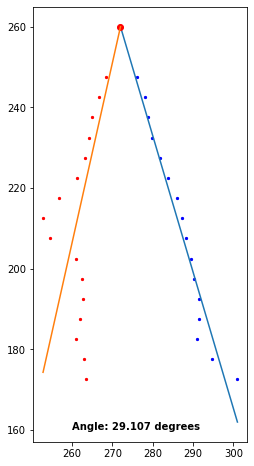

In [35]:
Gaussian_plot('VelocityMaps_co_300_324_SecondaryNorth.txt',272,260,260,160,"VelocityMap_Co_300_324_BlueSec.png","main",start_ind=3,end_ind=26)

### Co_325_374

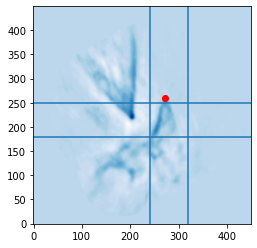

In [36]:
co_325_374_rot = ndimage.rotate(co_325_374, angle=-30,reshape=False)
plt.imshow(co_325_374_rot,cmap='Blues',origin='lower')
plt.axvline(240)
plt.axvline(320)
plt.axhline(250)
plt.axhline(180)
plt.plot(272,260,'ro') #Protostar

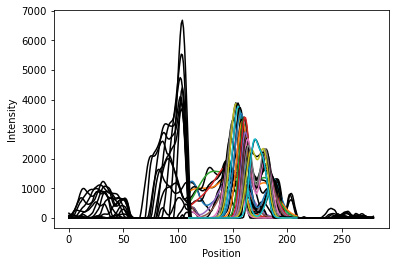

In [37]:
Gaussian_func("VelocityMaps_co_325_374_SecondaryNorth.txt",100,380,co_325_374_rot,110,210,-60)

Full Slice


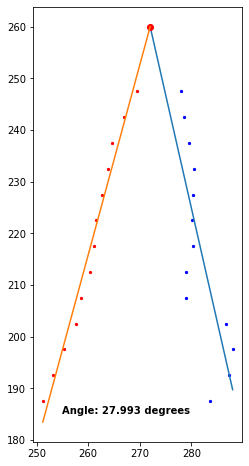

In [38]:
Gaussian_plot('VelocityMaps_co_325_374_SecondaryNorth.txt',272,260,255,185,"VelocityMap_Co_325_374_BlueSec.png","main",start_ind=6,end_ind=26)

### Co_375_424

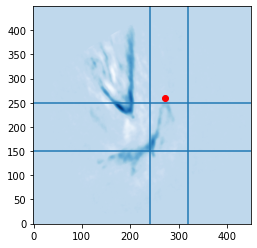

In [39]:
co_375_424_rot = ndimage.rotate(co_375_424, angle=-30,reshape=False)
plt.imshow(co_375_424_rot,cmap='Blues',origin='lower')
plt.axvline(240)
plt.axvline(320)
plt.axhline(250)
plt.axhline(150)
plt.plot(272,260,'ro') #Protostar

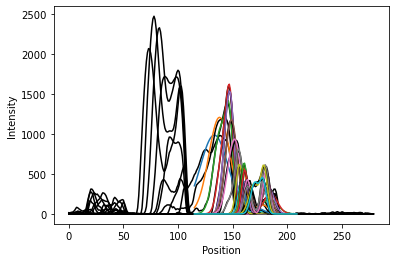

In [40]:
Gaussian_func("VelocityMaps_co_375_424_SecondaryNorth.txt",100,380,co_375_424_rot,115,210,-60)

Full Slice


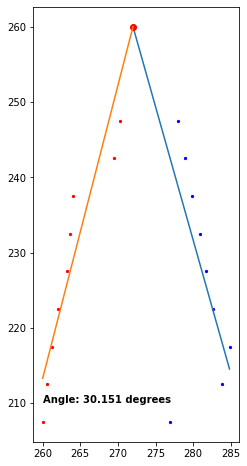

In [41]:
Gaussian_plot('VelocityMaps_co_375_424_SecondaryNorth.txt',272,260,260,210,"VelocityMap_Co_375_424_BlueSec.png","main",start_ind=10,end_ind=20)

### Co_425_474

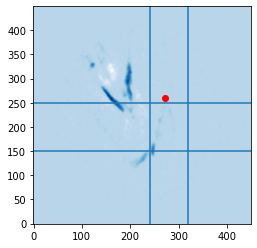

In [42]:
co_425_474_rot = ndimage.rotate(co_425_474, angle=-30,reshape=False)
plt.imshow(co_425_474_rot,cmap='Blues',origin='lower')
plt.axvline(240)
plt.axvline(320)
plt.axhline(250)
plt.axhline(150)
plt.plot(272,260,'ro') #Protostar

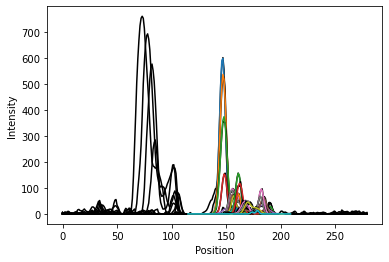

In [43]:
Gaussian_func("VelocityMaps_co_425_474_SecondaryNorth.txt",100,380,co_425_474_rot,115,210,-30)

Full Slice


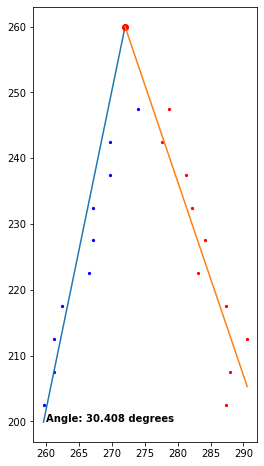

In [44]:
Gaussian_plot('VelocityMaps_co_425_474_SecondaryNorth.txt',272,260,260,200,"VelocityMap_Co_425_474_BlueSec.png","secondary",start_ind=9,end_ind=26)

### Co_475_524

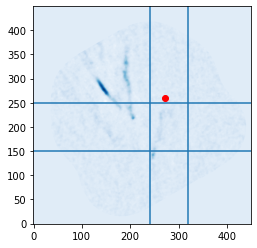

In [45]:
co_475_524_rot = ndimage.rotate(co_475_524, angle=-30,reshape=False)
plt.imshow(co_475_524_rot,cmap='Blues',origin='lower')
plt.axvline(240)
plt.axvline(320)
plt.axhline(250)
plt.axhline(150)
plt.plot(272,260,'ro') #Protostar

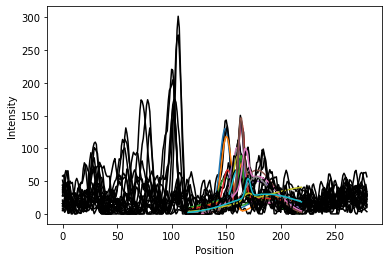

In [46]:
Gaussian_func("VelocityMaps_co_475_524_SecondaryNorth.txt",100,380,co_475_524_rot,115,220,-30)

Full Slice


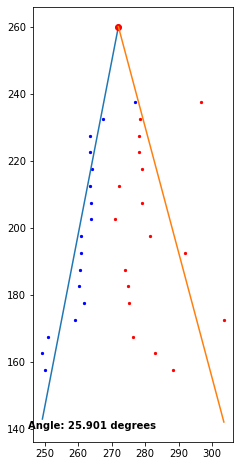

In [47]:
Gaussian_plot('VelocityMaps_co_475_524_SecondaryNorth.txt',272,260,245,140,"VelocityMap_Co_475_524_BlueSec.png","secondary",start_ind=0,end_ind=17)

### Co_525_574

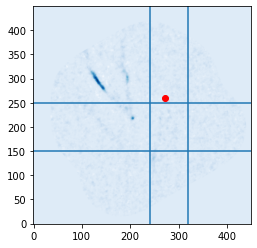

In [48]:
co_525_574_rot = ndimage.rotate(co_525_574, angle=-30,reshape=False)
plt.imshow(co_525_574_rot,cmap='Blues',origin='lower')
plt.axvline(240)
plt.axvline(320)
plt.axhline(250)
plt.axhline(150)
plt.plot(272,260,'ro') #Protostar

/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-

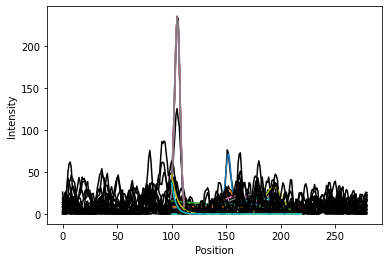

In [49]:
Gaussian_func("VelocityMaps_co_525_574_SecondaryNorth.txt",100,380,co_525_574_rot,100,220,-10)

Full Slice


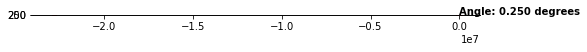

In [50]:
Gaussian_plot('VelocityMaps_co_525_574_SecondaryNorth.txt',272,260,255,260,"co525_574_angle_SecNorth.png","secondary",start_ind=0,end_ind=16)

## Plotting Outflows

## Main Outflows

In [51]:
''' Need to plot the gaussian and linear fits of the main outflows alongside the actual fits file.
The angle needs to also be plotted alongside it.'''


' Need to plot the gaussian and linear fits of the main outflows alongside the actual fits file.\nThe angle needs to also be plotted alongside it.'

In [52]:
'''Figure out a way to use subplots to plot them'''


'Figure out a way to use subplots to plot them'

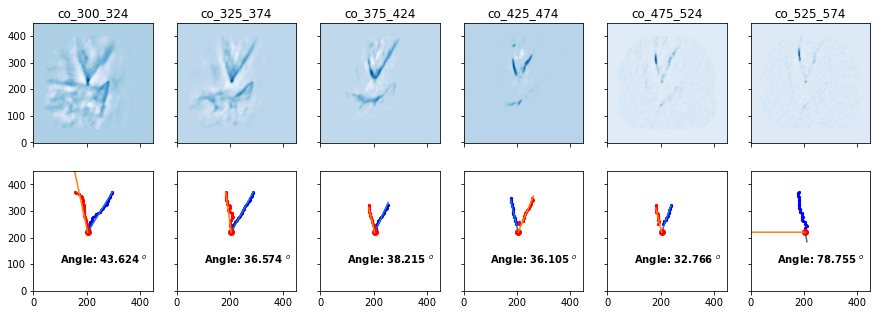

In [87]:
#Main Outflows
figure, ax = plt.subplots(2,6,figsize=[15,5],sharex=True,sharey=True)

Gauss_main = []

Gauss_main.append(Gaussian_subplot('VelocityMaps_co_300_324_North.txt',204,220,100,100,"VelocityMap_Co_300_324_Blue.png","main",1,0))
Gauss_main.append(Gaussian_subplot('VelocityMaps_co_325_374_North.txt',204,220,100,100,"VelocityMap_Co_325_374_Blue.png","main",1,1))
Gauss_main.append(Gaussian_subplot('VelocityMaps_co_375_424_North.txt',204,220,100,100,"VelocityMap_Co_375_424_Blue.png","main",1,2,start_ind=10))
Gauss_main.append(Gaussian_subplot('VelocityMaps_co_425_474_North.txt',204,220,100,100,"VelocityMap_Co_425_474_Blue.png","secondary",1,3,start_ind=5,end_ind=25))
Gauss_main.append(Gaussian_subplot('VelocityMaps_co_475_524_North.txt',204,220,100,100,"VelocityMap_Co_475_524_Blue.png","main",1,4,start_ind=10,end_ind=25))
Gauss_main.append(Gaussian_subplot('VelocityMaps_co_525_574_North.txt',204,220,100,100,"VelocityMap_Co_525_574_Blue.png","main",1,5))




strings = ['co_300_324','co_325_374','co_375_424','co_425_474','co_475_524','co_525_574']
data_main = [co_300_324,co_325_374,co_375_424,co_425_474,co_475_524,co_525_574]




# test = Gaussian_subplot('VelocityMaps_co_325_374_SecondaryNorth.txt',272,260,255,185,"VelocityMap_Co_325_374_BlueSec.png","main",0,0,start_ind=6,end_ind=26)


for j,data,string,plot_gauss in zip(range(0,6),data_main,strings,Gauss_main):
    ax[0,j].set_title(string)
    ax[0,j].imshow(data,cmap="Blues",origin='lower')
    plot_gauss
    
figure.savefig("Main_Blue_Outflow.png")




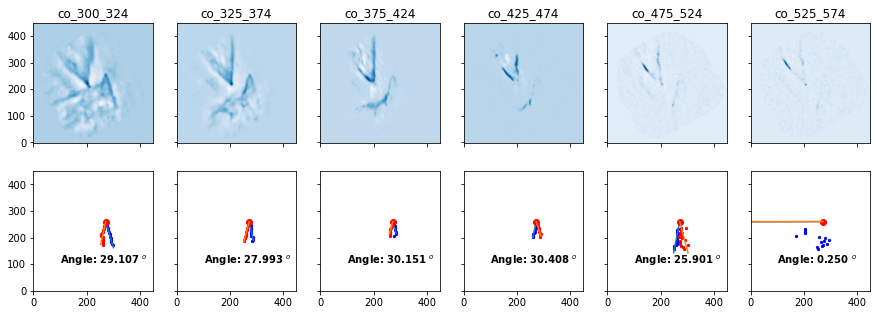

In [86]:
#Secondary Outflows

figure, ax = plt.subplots(2,6,figsize=[15,5],sharex=True,sharey=True)

Gauss_secondary = []

Gauss_secondary.append(Gaussian_subplot('VelocityMaps_co_300_324_SecondaryNorth.txt',272,260,100,100,"VelocityMap_Co_300_324_BlueSec.png","main",1,0,start_ind=3,end_ind=26))
Gauss_secondary.append(Gaussian_subplot('VelocityMaps_co_325_374_SecondaryNorth.txt',272,260,100,100,"VelocityMap_Co_325_374_BlueSec.png","main",1,1,start_ind=6,end_ind=26))
Gauss_secondary.append(Gaussian_subplot('VelocityMaps_co_375_424_SecondaryNorth.txt',272,260,100,100,"VelocityMap_Co_375_424_BlueSec.png","main",1,2,start_ind=10,end_ind=20))
Gauss_secondary.append(Gaussian_subplot('VelocityMaps_co_425_474_SecondaryNorth.txt',272,260,100,100,"VelocityMap_Co_425_474_BlueSec.png","secondary",1,3,start_ind=9,end_ind=26))
Gauss_secondary.append(Gaussian_subplot('VelocityMaps_co_475_524_SecondaryNorth.txt',272,260,100,100,"VelocityMap_Co_475_524_BlueSec.png","secondary",1,4,start_ind=0,end_ind=17))
Gauss_secondary.append(Gaussian_subplot('VelocityMaps_co_525_574_SecondaryNorth.txt',272,260,100,100,"co525_574_angle_SecNorth.png","secondary",1,5,start_ind=0,end_ind=16))


strings = ['co_300_324','co_325_374','co_375_424','co_425_474','co_475_524','co_525_574']
data_secondary = [co_300_324_rot,co_325_374_rot,co_375_424_rot,co_425_474_rot,co_475_524_rot,co_525_574_rot]

for j,data,string,plot_gauss in zip(range(0,6),data_secondary,strings,Gauss_secondary):
    ax[0,j].set_title(string)
    ax[0,j].imshow(data,cmap="Blues",origin='lower')
    plot_gauss
    
figure.savefig("Secondary_Blue_Outflow.png")